In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/New WinRAR ZIP archive.zip'

Archive:  /content/drive/MyDrive/New WinRAR ZIP archive.zip
  inflating: fake_news_data _finall.csv - fake_news_data (1).csv  
  inflating: merged_dataset12 - merged_dataset1.csv  


In [3]:
!unzip '/content/drive/MyDrive/archive (4).zip'

Archive:  /content/drive/MyDrive/archive (4).zip
  inflating: fake_news_data.csv      


In [5]:
import pandas as pd
file_path = '/content/fake_news_data _finall.csv - fake_news_data (1).csv'
df = pd.read_csv(file_path)


## بتحقق من عامود التوبيك شو موجود بقلبوا

In [7]:
print(f" Total rows: {len(df)}")
print(f" Column names: {df.columns.tolist()}")

label_col = 'label'
print(" Real vs Fake Count:")
print(df['Label'].value_counts())
if label_col in df.columns:
    print("\n Label distribution:")
    print(df[label_col].value_counts())
else:
    print(f" Column '{label_col}' not found. Please check column names above.")

 Total rows: 44151
 Column names: ['Label', 'Topic', 'Article_content']
 Real vs Fake Count:
Label
fake    40297
real     3854
Name: count, dtype: int64
 Column 'label' not found. Please check column names above.


In [8]:
if 'Topic' in df.columns:
    topic_counts = df['Topic'].value_counts()
    print(topic_counts)
else:
    print("Topic Doesn't Exist")


Topic
رياضة                     16984
سياسة                      7410
ثقافة وفن                  5841
صحة                        3458
أخبار                      3156
Sport                      1213
Politics                   1037
Science and Technology      800
Economic                    780
ترفيه                       501
news                        414
Social                      405
تكنولوجيا                   405
sport                       336
Economy                     321
middle-east                 135
health                      103
Science                      99
culture                      98
Sports                       92
tech                         90
entertainment                84
politics                     68
Tech                         48
Technology                   39
Religion                     36
business                     32
موسيقى                       29
Finance                      22
opinion                      14
midan                        14
sc

### بحذف التوبيك الغير مهمة و بعيدة عن فكرة الجرائم

In [9]:
import pandas as pd

df['Topic_clean'] = df['Topic'].str.lower().str.strip()

topics_to_remove = [
    'ترفيه', 'entertainment',
    'رياضة', 'sport', 'sports',
    'ثقافة', 'ثقافة وفن', 'فنون', 'فن', 'culture', 'arts',
    'موسيقى', 'music',
    'تكنولوجيا', 'tech', 'technology', 'science and technology', 'science',
    'اقتصاد', 'economic', 'economy', 'finance', 'business',
    'عائلة', 'family',
    'lifestyle', 'نمط الحياة', 'turath', 'midan','opinion'
]

df_filtered = df[~df['Topic_clean'].isin(topics_to_remove)]

df_filtered = df_filtered.drop(columns=['Topic_clean'])

print("number of rows after cleaning", len(df_filtered))
df_filtered['Topic'].value_counts()
df_filtered.to_csv('/content/drive/MyDrive/filtered_dataset.csv', index=False)
print("saved done :  filtered_crime_dataset.csv in Google Drive ")

number of rows after cleaning 16227
saved done :  filtered_crime_dataset.csv in Google Drive 


In [10]:
print("the topic after clean we will use")
print(df_filtered['Topic'].unique())

the topic after clean we will use
['politics' 'middle-east' 'Politics' 'Religion' 'Medical' 'Social' 'news'
 'health' 'أخبار' 'سياسة' 'صحة']


###  عملنا ميرج ل2 داتا بدنا ندرب عليهن

In [15]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/filtered_dataset.csv')
df2 = pd.read_csv('/content/merged_dataset12 - merged_dataset1.csv')

df1 = df1.drop(columns=['Topic'])
print("rows of first dataset", df1.columns)
print("rows of second dataset", df2.columns)

merged_df = pd.concat([df1, df2], ignore_index=True)

print("number of rows after merge", len(merged_df))

print(merged_df.head())
merged_df.to_csv('/content/drive/MyDrive/full_dataset.csv', index=False)
print(" Saved :merged_dataset_f.csv in Google Drive")

rows of first dataset Index(['Label', 'Article_content'], dtype='object')
rows of second dataset Index(['Label', 'Article_content'], dtype='object')
number of rows after merge 18227
  Label                                    Article_content
0  real  القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1  real  طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2  real  غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3  real  نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4  real  بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...
 Saved :merged_dataset_f.csv in Google Drive


In [13]:
print(merged_df.head(20))


   Label                                    Article_content
0   real  القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1   real  طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2   real  غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3   real  نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4   real  بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...
5   real  يرى الخبير العسكري والإستراتيجي العقيد ركن حات...
6   real  بغداد- في خطوة مفاجئة وخلال أيام عيد الفطر، أع...
7   real  تركز كثير من انتقادات الغرب لإسرائيل على رئيس ...
8   real  لومي- في تطور سياسي مثير تشهده جمهورية توغو، ق...
9   real  بعد عام من القتال الذي اندلع في العاصمة السودا...
10  real  برلين- من جديد يواجه صحفيون متعاطفون مع القضية...
11  real  الحق يقال إن إسرائيل خسرت الحرب، على حد تعبير ...
12  real  ركز محللون وخبراء إسرائيليون في نقاشاتهم بقنوا...
13  real  ترجمة وتحرير: علي بابكر نشرت صحيفة "واشنطن بوس...
14  real  دبي، الإمارات العربية المتحدة (CNN)-- أعلنت هي...
15  real  (CNN)-- دعا البيت الأبيض إيران

### التحقق من قيم ال NULL

In [16]:
print(merged_df.isnull().sum())


Label              0
Article_content    0
dtype: int64


### بتحقق من وجود تشكيل + رموز غريبة و إلخ

In [17]:
import re

def has_arabic_tashkeel(text):
    tashkeel_pattern = r'[\u064B-\u0652]'
    return bool(re.search(tashkeel_pattern, str(text)))

tashkeel_flags = merged_df['Article_content'].apply(has_arabic_tashkeel)
print("Number of Articles that has Tashkeel ", tashkeel_flags.sum())


Number of Articles that has Tashkeel  7732


In [18]:
def has_strange_symbols(text):
    return bool(re.search(r'[؟?!@#$%^&*~<>+=_]', str(text)))

symbol_flags = merged_df['Article_content'].apply(has_strange_symbols)
print("Number of Articles that has strange Symbols", symbol_flags.sum())


Number of Articles that has strange Symbols 1128


In [ ]:
empty_texts = merged_df['Article_content'].apply(lambda x: pd.isna(x) or str(x).strip() == '')
print(" Empty or missing rows in 'Article_content':", empty_texts.sum())

 Empty or missing rows in 'Article_content': 130


In [20]:
has_many_digits = merged_df['Article_content'].apply(lambda x: len(re.findall(r'\d', str(x))) > 5)
print("has many digits ", has_many_digits.sum())


has many digits  837


In [21]:
has_english_words = merged_df['Article_content'].apply(lambda x: bool(re.search(r'[a-zA-Z]', str(x))))
print("articles has english words", has_english_words.sum())


articles has english words 1565


### بعمل preprocessing

In [22]:
import re

def clean_article(text):
    text = str(text)

    text = re.sub(r'http\S+|www.\S+', '', text)

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # رموز تعبيرية
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    text = re.sub(r'#\S+|@\S+', '', text)

    text = re.sub(r'\[\]|\bcontent not available\b', '', text, flags=re.IGNORECASE)

    text = re.sub(r'[•▪️—–…·]', '', text)

    common_phrases = [
        r'التفاصيل هنا\s*:', r'اقرأ أيضًا', r'اقرأ المزيد',
        r'المزيد من التفاصيل', r'تابع التفاصيل'
    ]
    for phrase in common_phrases:
        text = re.sub(phrase, '', text, flags=re.IGNORECASE)

    text = re.sub(r'[.:;()\[\]{}"\'«»<>\-]', '', text)

    text = re.sub(r'\\n|\\r|\n|\r', ' ', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [23]:
merged_df['Article_content'] = merged_df['Article_content'].apply(clean_article)

In [24]:
cleaned_df = merged_df[merged_df['Article_content'].str.strip() != '']

print("Number of Articles after clean ", len(cleaned_df))


Number of Articles after clean  18097


In [25]:
empty_texts = cleaned_df['Article_content'].apply(lambda x: str(x).strip() == '')
print("Blank or spaces only articles:", empty_texts.sum())


Blank or spaces only articles: 0


In [ ]:
cleaned_df.to_csv('/content/drive/MyDrive/full_dataset.csv', index=False)


### منبلش تدريب المودل بعد التنظيف

In [ ]:
from sklearn.model_selection import train_test_split

X = cleaned_df['Article_content']
y = cleaned_df['Label']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.9480662983425414
 Classification Report:
               precision    recall  f1-score   support

        fake       0.95      0.99      0.97      3265
        real       0.91      0.52      0.66       355

    accuracy                           0.95      3620
   macro avg       0.93      0.76      0.82      3620
weighted avg       0.95      0.95      0.94      3620



In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


label_mapping = {'fake': 0, 'real': 1}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": MultinomialNB(),  # ما بيدعم class_weight
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000, class_weight='balanced')
}

results = {}

for name, model in models.items():
    print(f"\n Training {name}...")

    if name == "XGBoost":
        model.fit(X_train_vec, y_train_encoded)
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test_encoded, y_pred)
    else:
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test, y_pred)

    results[name] = acc
    print(f" {name} Accuracy: {acc:.4f}")



 Training Logistic Regression...
 Logistic Regression Accuracy: 0.9555

 Training Random Forest...
 Random Forest Accuracy: 0.9699

 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost Accuracy: 0.9633

 Training Naive Bayes...
 Naive Bayes Accuracy: 0.9356

 Training Passive Aggressive...
 Passive Aggressive Accuracy: 0.9666


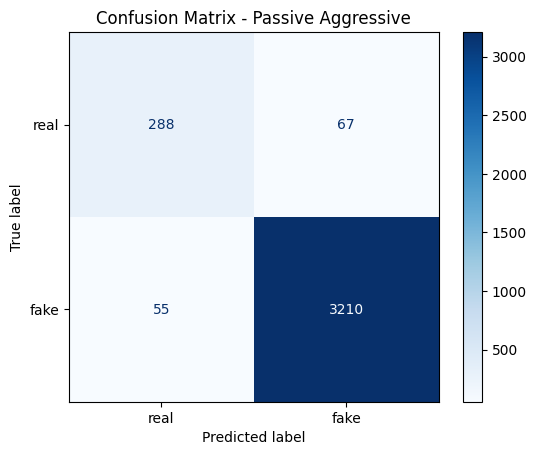

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier

best_model = PassiveAggressiveClassifier(max_iter=1000)
best_model.fit(X_train_vec, y_train)

y_pred = best_model.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred, labels=["real", "fake"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["real", "fake"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Passive Aggressive")
plt.show()


In [ ]:
print("Number of Article According to classification")
print(cleaned_df['Label'].value_counts())


Number of Article According to classification
Label
fake    16321
real     1776
Name: count, dtype: int64


### وبعد التحقق بكتشف من عدم توازن الداتا
### ال real اصغر بكتير من fake



In [ ]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.0 MB/s eta 0:00:00


### عملنا Augmentation لل real

##### أعلنت وزارة الصحة عن تسجيل 120 إصابة جديدة بفيروس كورونا خلال الـ24 ساعة الماضية.
##### وزارة الصحة صرّحت بتسجيل 120 حالة إصابة جديدة بكورونا خلال الأربع وعشرين ساعة الأخيرة.



In [ ]:
from deep_translator import GoogleTranslator
import random

def back_translate_arabic(text):
    try:
        translated_en = GoogleTranslator(source='ar', target='en').translate(text)
        translated_back = GoogleTranslator(source='en', target='ar').translate(translated_en)
        return translated_back
    except:
        return text
sample_real = cleaned_df[cleaned_df['Label'] == 'real'].sample(min(3000, len(cleaned_df[cleaned_df['Label'] == 'real'])), random_state=42)

augmented_real_texts = sample_real['Article_content'].apply(back_translate_arabic)

augmented_df = sample_real.copy()
augmented_df['Article_content'] = augmented_real_texts

augmented_all = pd.concat([cleaned_df, augmented_df]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Data Augmentation Done")

Data Augmentation Done


In [ ]:
print("The distribution after New Augmentation:")
print(augmented_all['Label'].value_counts())


The distribution after New Augmentation:
Label
fake    16321
real     3552
Name: count, dtype: int64


In [ ]:
augmented_real_only = augmented_all[(augmented_all['Label'] == 'real')]
print("Some real articles after reverse translation:\n")
print(augmented_real_only['Article_content'].sample(5, random_state=42).values)


Some real articles after reverse translation:

['إن نفق الماوس الأفريقي الضخم ، الذي يحمل العديد من الجوائز البارزة بعد أن أنقذ حياة العديد من السنوات العديدة ، من خلال اكتشاف الألغام الأرضية من خلال الشعور بالرائحة ، وساعد الماوس الذي كان يعيش في تنزانيا على إزالة الألغام من الأراضي بمساحة من 42 حقول كرة قدم ، خلال مسيرة خمس سنوات لمدة خمس سنوات.'
 'خلال اسبوعيننالمرور تحتجز نحو 2800 عجلة خصوصي تعمل في الاجرة ببغداد'
 'CNN اقتحم مئات المستوطنين الإسرائيليين المسلحين قرية في الضفة الغربية، الجمعة، وأضرموا النار في عدد من المنازل والسيارات، في واحدة من أكبر هجمات المستوطنين هذا العام، بحسب مسؤولين فلسطينيين وقتل شاب فلسطيني على الأقل، برصاص مستوطنين إسرائيليين في قرية المغير شرق رام الله، بحسب رئيس مجلس قروي المغير أمين أبو عليا وقال أمين أبو عليا إنه تعرف على الفلسطيني القتيل بأنه قريب له يبلغ من العمر 26 عاما ويدعى جهاد أبو عليا، وكان من المفترض أن يتزوج هذا الصيف وأصيب ما لا يقل عن 25 آخرين في أعمال العنف، وفقا لوزارة الصحة الفلسطينية في رام الله، والتي لم يشهد نطاقها مثيلا منذ أن اق

In [ ]:
X = augmented_all['Article_content']
y = augmented_all['Label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
label_mapping = {'fake': 0, 'real': 1}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": MultinomialNB(),
    "SVM (LinearSVC)": LinearSVC(),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000)
}

results = {}

for name, model in models.items():
    print(f"\n Training {name}...")

    if name == "XGBoost":
        model.fit(X_train_vec, y_train_encoded)
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test_encoded, y_pred)
    else:
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test, y_pred)

    results[name] = acc
    print(f" {name} Accuracy: {acc:.4f}")

print(classification_report(y_test, y_pred, target_names=["real", "fake"]))



 Training Logistic Regression...
 Logistic Regression Accuracy: 0.9620

 Training Random Forest...
 Random Forest Accuracy: 0.9723

 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost Accuracy: 0.9698

 Training Naive Bayes...
 Naive Bayes Accuracy: 0.9245

 Training SVM (LinearSVC)...
 SVM (LinearSVC) Accuracy: 0.9743

 Training Passive Aggressive...
 Passive Aggressive Accuracy: 0.9701
              precision    recall  f1-score   support

        real       0.98      0.98      0.98      3265
        fake       0.92      0.91      0.92       710

    accuracy                           0.97      3975
   macro avg       0.95      0.95      0.95      3975
weighted avg       0.97      0.97      0.97      3975



### منلاحظ من الكونفيوجن
### بما انو الداتا غير متوازنة فعم يعطي نتائج مو كتير جيدة

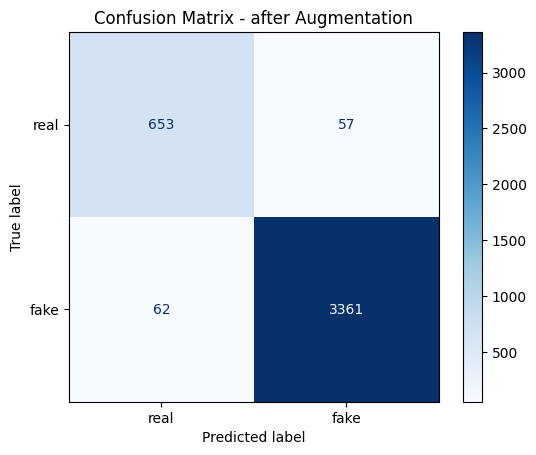

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_model = PassiveAggressiveClassifier(max_iter=1000)
best_model.fit(X_train_vec, y_train)
y_pred = best_model.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred, labels=["real", "fake"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["real", "fake"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - after Augmentation")
plt.show()


### قررنا بعدا نعمل augmentation for real t0 5000
### resample for fake to 5000

In [ ]:
!pip install deep-translator


In [ ]:
from deep_translator import GoogleTranslator
import pandas as pd

def back_translate_arabic(text):
    try:
        translated_en = GoogleTranslator(source='ar', target='en').translate(text)
        translated_back = GoogleTranslator(source='en', target='ar').translate(translated_en)
        return translated_back
    except:
        return text

real_df = cleaned_df[cleaned_df['Label'] == 'real']
real_count = len(real_df)
needed_augmented = 5000 - real_count

sample_for_aug = real_df.sample(n=needed_augmented, replace=True, random_state=42)

augmented_texts = sample_for_aug['Article_content'].apply(back_translate_arabic)

augmented_real_df = sample_for_aug.copy()
augmented_real_df['Article_content'] = augmented_texts

final_real_df = pd.concat([real_df, augmented_real_df]).reset_index(drop=True)

fake_df = cleaned_df[cleaned_df['Label'] == 'fake'].sample(n=5000, random_state=42).reset_index(drop=True)

balanced_df = pd.concat([final_real_df, fake_df]).sample(frac=1, random_state=42).reset_index(drop=True)

print("\n Final distribution:")
print(balanced_df['Label'].value_counts())

print("\n Features from real :")
print(balanced_df[balanced_df['Label'] == 'real'].head(2))

print("\nFeatures from fake :")
print(balanced_df[balanced_df['Label'] == 'fake'].head(2))



 Final distribution:
Label
fake    5000
real    5000
Name: count, dtype: int64

 Features from real :
  Label                                    Article_content
1  real  يقول رئيس كازاخستان إن قوات منظمة معاهدة الأمن...
2  real  بارزاني العمل المشترك بين بغداد واربيل اسهم بخ...

Features from fake :
  Label                                    Article_content
0  fake        خبر زائف حول وفاة الملك سلمان بن عبد العزيز
5  fake  النهضة لم تُعلن عن استقالة الغنوشي من رئاسة ال...


In [ ]:
from sklearn.model_selection import train_test_split

X = balanced_df['Article_content']
y = balanced_df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report

model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))



 Accuracy: 0.97

 Classification Report:
               precision    recall  f1-score   support

        fake       0.97      0.97      0.97      1000
        real       0.97      0.97      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": MultinomialNB(),
    "SVM (LinearSVC)": LinearSVC(),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=1000)
}

results = {}

for name, model in models.items():
    print(f"\n Training {name}...")

    if name == "XGBoost":
        label_mapping = {'fake': 0, 'real': 1}
        y_train_encoded = y_train.map(label_mapping)
        y_test_encoded = y_test.map(label_mapping)

        model.fit(X_train_vec, y_train_encoded)
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test_encoded, y_pred)
        print(f" Accuracy: {acc:.4f}")
        print(classification_report(y_test_encoded, y_pred, target_names=["fake", "real"]))
    else:
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test, y_pred)
        print(f" Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))

    results[name] = acc



 Training Logistic Regression...
 Accuracy: 0.9635
              precision    recall  f1-score   support

        fake       0.99      0.94      0.96      1000
        real       0.94      0.99      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000


 Training Random Forest...
 Accuracy: 0.9720
              precision    recall  f1-score   support

        fake       0.99      0.95      0.97      1000
        real       0.95      0.99      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:45:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Accuracy: 0.9655
              precision    recall  f1-score   support

        fake       0.98      0.95      0.96      1000
        real       0.95      0.98      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


 Training Naive Bayes...
 Accuracy: 0.9300
              precision    recall  f1-score   support

        fake       0.92      0.94      0.93      1000
        real       0.94      0.92      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000


 Training SVM (LinearSVC)...
 Accuracy: 0.9720
              precision    recall  f1-score   support

        fake       0.99      0.96      0.97      1000
        real       0.96      0.99      0.97      1000

    accuracy                           0.97      2000
   macro avg      

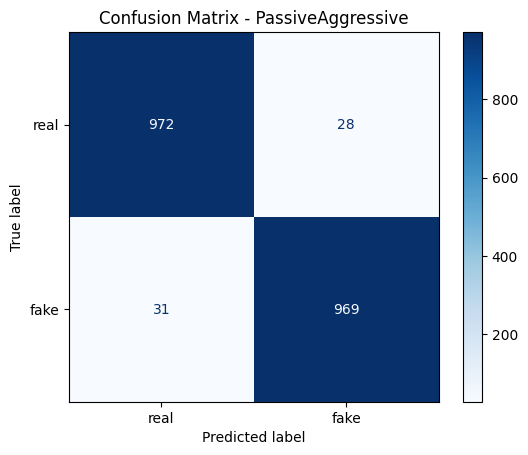

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred, labels=["real", "fake"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["real", "fake"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - PassiveAggressive")
plt.show()


In [ ]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/fake_news2_model.pkl')

joblib.dump(vectorizer, '/content/drive/MyDrive/tfidf_vectorizer2.pkl')

print(" saved on google drive")


 saved on google drive


In [ ]:
def predict_article(text):
    cleaned_text = clean_article(text)

    text_vec = vectorizer.transform([cleaned_text])

    prediction = model.predict(text_vec)[0]

    print("\n text", cleaned_text[:150], "...")
    print(" Prediction ", " REAL" if prediction == 'real' else " FAKE")


In [ ]:
sample_text = "ادعى أحد الحسابات أن الحكومة أصدرت قرارًا بإعفاء الضرائب، لكن لم يصدر أي بيان رسمي بذلك."
predict_article(sample_text)



 text ادعى أحد الحسابات أن الحكومة أصدرت قرارًا بإعفاء الضرائب، لكن لم يصدر أي بيان رسمي بذلك ...
 Prediction   REAL


In [ ]:
sample_text = "أعلنت وزارة الصحة اليوم عن تسجيل 125 إصابة جديدة بفيروس كورونا، كما تم تسجيل 98 حالة تعافٍ، و3 حالات وفاة. وأكدت الوزارة في بيانها استمرار حملات التوعية والتطعيم في كافة المناطق، داعية المواطنين إلى الالتزام بالإجراءات الاحترازية المعلنة سابقًا."
predict_article(sample_text)



 text أعلنت وزارة الصحة اليوم عن تسجيل 125 إصابة جديدة بفيروس كورونا، كما تم تسجيل 98 حالة تعافٍ، و3 حالات وفاة وأكدت الوزارة في بيانها استمرار حملات التوعي ...
 Prediction   REAL
